In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
    # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
import pandas as pd

In [5]:
retail=pd.read_csv("retail_sale.csv")

In [7]:
retail.columns

Index(['realtime_start', 'realtime_end', 'date', 'value'], dtype='object')

In [8]:
uv=retail.drop(columns=['realtime_start', 'realtime_end', 'date'])

In [9]:
uv

,value
0,0.4
1,8.6
2,3.3
3,3.6
4,-0.4
...,...
328,-5.7
329,3.3
330,2.7
331,-9.1


<b>define input sequence</b><br>
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]<br>
choose a number of time steps<br>
n_steps = 3<br>
split into samples<br>
X, y = prepare_data(timeseries_data, n_steps)<br>

In [37]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(uv["value"], n_steps)

In [38]:
y

array([  3.6,  -0.4,   0.5,  -0.1,  -2.8,   5.3,  -0.7,  23.6, -28.4,
        -1.9,  13.8,   3.7,   3.1,  -0.3,   1. ,  -0.4,  -2.9,   2.9,
         3.7,  21.3, -29.5,   0.7,  18.6,  -1.6,   2.8,   1.7,  -3. ,
         5.3,  -4. ,   2. ,   3.2,  20.2, -28.7,  -1.8,  17.2,  -2.9,
         7.7,   0.7,  -4.5,   5.7,  -5.6,   1. ,   5. ,  17.7, -26.4,
         3.9,  10.3,   0. ,   7.2,  -4.4,   0.2,   3.6,  -7.3,   6.6,
         0.8,  16.6, -23.8,  -1.5,  14.2,  -2.2,   6.2,  -2.8,   1.6,
         1.5,  -5. ,   4.3,  -1.2,  20.2, -24.8,  -2. ,  13.2,   2.1,
         4.2,  -0.1,  -1.4,  -0.5,  -3.6,   5.5,  -0.7,  21.3, -25.9,
         1.3,  15.4,  -1.4,   4.6,  -0.3,   0.1,   1.5,  -4.1,   1.1,
         3.3,  21.7, -27.1,   6.3,  11.7,  -5.8,   7.8,  -1. ,  -4.2,
         5.3,  -5.4,   0.6,   2.8,  16.7, -22.9,  -1.2,  13.2,  -1.7,
         7.9,  -3.1,  -3.4,   5.9, -11.4,  12.3,  -1.2,  14. , -22.8,
        -1.1,  12.7,   0.1,   5.6,  -4.2,   2.5,   4.1, -11.3,   5.5,
         1.5,  17.1,

In [39]:
print(X.shape)

(330, 3)


In [40]:
print(y.shape)

(330,)


In [41]:
X.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [42]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [43]:
#or

In [44]:
B=X.reshape(X.shape[0],X.shape[1],1)

In [45]:
B.shape

(330, 3, 1)

In [46]:
X.shape

(330, 3, 1)

# Building LSTM Mode

In [47]:
n_steps

3

In [49]:
n_features  # univariate numver of features is 1

1

In [53]:
# define model

In [51]:
model=Sequential()

model.add(LSTM (50, activation ="relu" , return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation ="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

#fit model
model.fit(X,y, epochs=300, verbose=1 )



Epoch 1/300
11/11 [==============================] - 0s 10ms/step - loss: 98.4540
Epoch 2/300
11/11 [==============================] - 0s 7ms/step - loss: 92.8971
Epoch 3/300
11/11 [==============================] - 0s 7ms/step - loss: 86.9580
Epoch 4/300
11/11 [==============================] - 0s 7ms/step - loss: 80.8112
Epoch 5/300
11/11 [==============================] - 0s 6ms/step - loss: 73.4879
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 64.0370
Epoch 7/300
11/11 [==============================] - 0s 6ms/step - loss: 50.3341
Epoch 8/300
11/11 [==============================] - 0s 6ms/step - loss: 38.2845
Epoch 9/300
11/11 [==============================] - 0s 7ms/step - loss: 34.9117
Epoch 10/300
11/11 [==============================] - 0s 6ms/step - loss: 32.5156
Epoch 11/300
11/11 [==============================] - 0s 7ms/step - loss: 30.8014
Epoch 12/300
11/11 [==============================] - 0s 7ms/step - loss: 29.9346
Epoch 13/300
11/11 [====

Epoch 101/300
11/11 [==============================] - 0s 8ms/step - loss: 19.0704
Epoch 102/300
11/11 [==============================] - 0s 7ms/step - loss: 18.4479
Epoch 103/300
11/11 [==============================] - 0s 7ms/step - loss: 18.4855
Epoch 104/300
11/11 [==============================] - 0s 7ms/step - loss: 18.5273
Epoch 105/300
11/11 [==============================] - 0s 7ms/step - loss: 19.0650
Epoch 106/300
11/11 [==============================] - 0s 7ms/step - loss: 18.5463
Epoch 107/300
11/11 [==============================] - 0s 8ms/step - loss: 18.5757
Epoch 108/300
11/11 [==============================] - 0s 10ms/step - loss: 18.4160
Epoch 109/300
11/11 [==============================] - 0s 7ms/step - loss: 18.9553
Epoch 110/300
11/11 [==============================] - 0s 7ms/step - loss: 18.9743
Epoch 111/300
11/11 [==============================] - 0s 8ms/step - loss: 19.1355
Epoch 112/300
11/11 [==============================] - 0s 7ms/step - loss: 18.2992
Epo

11/11 [==============================] - 0s 7ms/step - loss: 12.3179
Epoch 200/300
11/11 [==============================] - 0s 6ms/step - loss: 10.9973
Epoch 201/300
11/11 [==============================] - 0s 6ms/step - loss: 10.9388
Epoch 202/300
11/11 [==============================] - 0s 7ms/step - loss: 10.3015
Epoch 203/300
11/11 [==============================] - 0s 7ms/step - loss: 10.7204
Epoch 204/300
11/11 [==============================] - 0s 7ms/step - loss: 11.2066
Epoch 205/300
11/11 [==============================] - 0s 6ms/step - loss: 10.0861
Epoch 206/300
11/11 [==============================] - 0s 6ms/step - loss: 10.5788
Epoch 207/300
11/11 [==============================] - 0s 6ms/step - loss: 11.5788
Epoch 208/300
11/11 [==============================] - 0s 7ms/step - loss: 10.5397
Epoch 209/300
11/11 [==============================] - 0s 7ms/step - loss: 11.6029
Epoch 210/300
11/11 [==============================] - 0s 6ms/step - loss: 11.0788
Epoch 211/300
11/1

11/11 [==============================] - 0s 5ms/step - loss: 5.8469
Epoch 299/300
11/11 [==============================] - 0s 5ms/step - loss: 5.6244
Epoch 300/300
11/11 [==============================] - 0s 8ms/step - loss: 5.2582


In [70]:
X[329:330]

array([[[ 3.3],
        [ 2.7],
        [-9.1]]])

In [75]:
len(list(x_input))

1

In [82]:
list(x_input)[1:]

[]

In [81]:
list(x_input)

[array([[1.9257389],
        [3.8544028],
        [0.3820293]], dtype=float32)]

In [83]:
# demonstrate prediction for next 10 days
x_input = X[329:330]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
 
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input,"ORIGINAL")
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input,"RESHAPED")
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        print(temp_input, "TEMP _INPUT")
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[5.376899]
[5.376899]
[5.376899]
3 day input [5.376899 5.376899 5.376899]
3 day output [[-8.478994]]
[5.376899, 5.376899, 5.376899, -8.478994] TEMP _INPUT
4 day input [ 5.376899  5.376899 -8.478994]
4 day output [[-2.4594624]]
[5.376899, 5.376899, -8.478994, -2.4594624] TEMP _INPUT
5 day input [ 5.376899  -8.478994  -2.4594624]
5 day output [[10.259]]
[5.376899, -8.478994, -2.4594624, 10.259] TEMP _INPUT
6 day input [-8.478994  -2.4594624 10.259    ]
6 day output [[1.9257389]]
[-8.478994, -2.4594624, 10.259, 1.9257389] TEMP _INPUT
7 day input [-2.4594624 10.259      1.9257389]
7 day output [[3.8544028]]
[-2.4594624, 10.259, 1.9257389, 3.8544028] TEMP _INPUT
8 day input [10.259      1.9257389  3.8544028]
8 day output [[0.3820293]]
[10.259, 1.9257389, 3.8544028, 0.3820293] TEMP _INPUT
9 day input [1.9257389 3.8544028 0.3820293]
9 day output [[-0.25735378]]
[1.9257389, 3.8544028, 0.3820293, -0.25735378] TEMP _INPUT
[5.376899, 5.376899, 5.376899, -8.478994, -2.4594624, 10.259, 1.9257389, 3

In [84]:
lst_output

[5.376899,
 5.376899,
 5.376899,
 -8.478994,
 -2.4594624,
 10.259,
 1.9257389,
 3.8544028,
 0.3820293,
 -0.25735378]

# Visualizing the prediction

In [85]:
import matplotlib.pyplot as plt

In [86]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

In [186]:
day_new

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [280]:
k=uv["value"].tail(9).tolist()

In [270]:
len(k)

9

In [278]:
new=k

In [279]:
for i in lst_output[2:]:
    new.append(i)
   

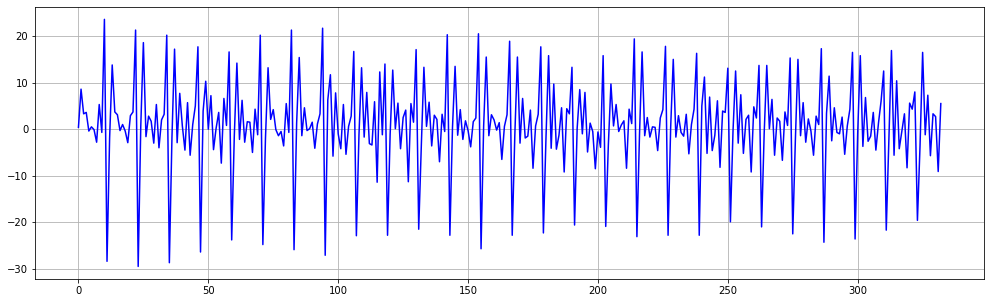

In [162]:
uv["value"].plot( figsize=(17,5), grid=True, color="blue" , label="ORIGINAL data")

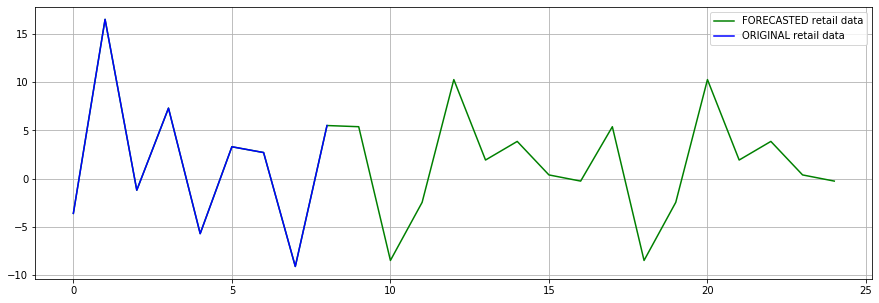

In [281]:
pd.Series(new).plot( figsize=(15,5), grid=True, color="green" , label="FORECASTED retail data")
pd.Series(k).plot( figsize=(15,5), grid=True, color="blue" , label="ORIGINAL retail data")

plt.legend()